NameError: name 'datai' is not defined

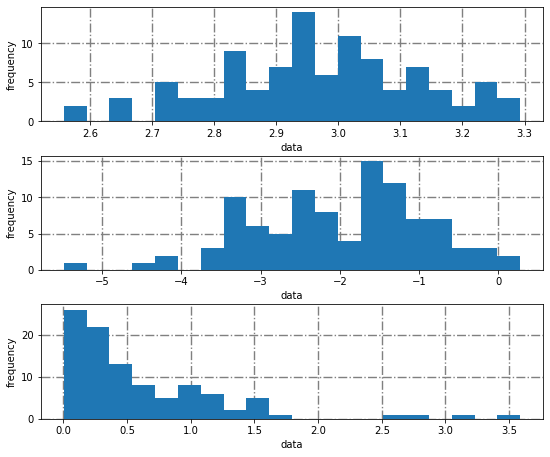

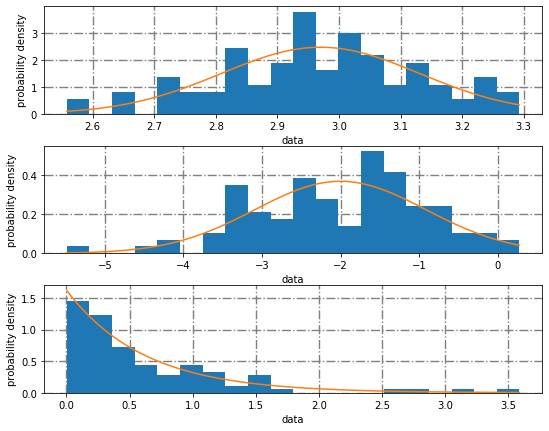

In [54]:
#Filename: HW1_MLE_skeleton.py
#Author: Harald Leisenberger
#Edited: March, 2023

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.stats as stats

#--------------------------------------------------------------------------------
# Assignment 1 - Section 2
#--------------------------------------------------------------------------------

def main():    
    
    
    # !!! All undefined functions should be implemented in the section 'Helper Functions' !!!
    
    
    # Load the three data arrays (100 x 1 - arrays)
    data1 = np.loadtxt('HW1_MLE_1.data')
    data2 = np.loadtxt('HW1_MLE_2.data')
    data3 = np.loadtxt('HW1_MLE_3.data')
    
    data = np.vstack((data1, data2, data3));
    
    
    # 2.1 Maximum Likelihood Model Estimation (MLE)
    # ---------------------------------------------
    
    # Make histogram plots of the data
    #---NEU
    # Plot a histogram of data 1-3
    fig, axs = plt.subplots(3, 1)
    for i_plot in range(0, data.shape[0]):
        axs[i_plot].grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")
        axs[i_plot].hist(data[i_plot, :], bins=20)
        axs[i_plot].set_axisbelow(True)
        axs[i_plot].set_xlabel('data')
        axs[i_plot].set_ylabel('frequency')
    fig.tight_layout()
    fig.set_size_inches(8, 7)
    plt.subplots_adjust(hspace=0.3)
    
    # Estimate the true model parameters via MLE
    ML_param_1 = ML_estimation(data1)
    ML_param_2 = ML_estimation(data2)
    ML_param_3 = ML_estimation(data3)
    
    ML_param = (ML_param_1, ML_param_2, ML_param_3)
    
    # Plot the estimated densities together with the data points
    fig, axs = plt.subplots(3, 1)
    for i_plot in range(0, data.shape[0]):
        params = ML_param[i_plot]
        axs[i_plot].grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")
        axs[i_plot].hist(data[i_plot, :], bins=20, density=True)
        axs[i_plot].set_axisbelow(True)
        axs[i_plot].set_xlabel('data')
        axs[i_plot].set_ylabel('probability density')
        x = np.linspace(min(data[i_plot, :]), max(data[i_plot, :]), num=100)
        if not np.isscalar(params):
            axs[i_plot].plot(x, 1/(params[1]*np.sqrt(2*np.pi))*np.e**(-.5*(-(params[0]-x)/params[1])**2))
        else:
            axs[i_plot].plot(x, params*np.e**(-params*x))
    fig.tight_layout()
    fig.set_size_inches(8, 7)
    plt.subplots_adjust(hspace=0.3)
    
    
    
    # 2.2 Evaluation and Visualization of the Likelihood Function
    # -----------------------------------------------------------
    
    # 3D plots of the joint likelihood functions of the Gaussian distributed data
    # TODO: specify parameters and insert the correct numbers for i and j. Choose reasonable grid boundaries / resolution.
    plot_likelihood_Gauss(datai,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq)
    plot_likelihood_Gauss(dataj,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq) 
    
    # Numerical MLE for the Gaussian distributed data
    # TODO: specify parameters and insert the correct numbers for i and j. Choose reasonable grid boundaries / resolution.
    ML_num_i = ML_numerical_Gauss(datai,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq)
    ML_num_j = ML_numerical_Gauss(dataj,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq)
    
    # 2D plot of the joint likelihood function of exponential distributed data
    # TODO: specify parameters and insert the correct number for k. Choose reasonable grid boundaries / resolution.
    plot_likelihood_Exp(datak,lambda_min,lambda_max,resolution_lambda) 
    
    # Numerical MLE for the exponential distributed data
    # TODO: specify parameters and insert the correct number for k. Choose reasonable grid boundaries / resolution.
    ML_num_k = ML_numerical_Exp(datak,lambda_min,lambda_max,resolution_lambda)
    
    
    # 2.3 Bayesian Model Estimation
    # -----------------------------
    
    # Compute the posterior distributions for the means of the Gaussian data, given the prior distribution N(mu|0.5,1)
    # TODO: specify parameters and insert the correct numbers for i and j.
    posterior_param_i = posterior_mean_Gauss(datai,mu_prior,mu_ML,sigma_sq_prior,sigma_sq_true)
    posterior_param_j = posterior_mean_Gauss(dataj,mu_prior,mu_ML,sigma_sq_prior,sigma_sq_true)
    
    # Plot the prior distribution and the two posterior distributions of the means for the Gaussian distributed data arrays
    # TODO
    
    
    pass


#--------------------------------------------------------------------------------
# Helper Functions (to be implemented!)
#--------------------------------------------------------------------------------


def ML_estimation(data):
    
    """ estimates the maximum likelihood parameters for a given data sample.
    
    Input:  data ... an array of 1-dimensional data points
    
    Output: ML_param ... the values of the maximum likelihood estimators for all parameters
                         of the corresponding distribution (i.e., 1-D Gaussian or 1-D exponential)
    """
    
    mu = np.mean(data)
    sigma = np.sqrt(np.mean((mu - data)**2))
    lambd = 1/mu
    MLF_gauss, MLF_exponential = 1, 1
    
    for x in data:
        MLF_gauss *= 1/(sigma*np.sqrt(2*np.pi))*np.e**(-.5*(-(mu-x)/sigma)**2)
        MLF_exponential *= lambd*np.e**(-lambd*x)
        
    if MLF_gauss > MLF_exponential:
        ML_param = (mu, sigma)
    else:
        ML_param = lambd
    
    return ML_param

#--------------------------------------------------------------------------------

def plot_likelihood_Gauss(data,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq):
    
    """ Plots the joint likelihood function for mu and sigma^2 for a given 1-D Gaussian data sample on
        a predefined grid.
    
    Input:  data ... an array of 1-dimensional Gaussian distributed data points
            mu_min ... lower boundary of the grid on the mu-axis
            mu_max ... upper boundary of the grid on the mu-axis
            sigma_sq_min ... lower boundary of the grid on the sigma^2-axis
            sigma_sq_max ... upper boundary of the grid on the sigma^2-axis
            resolution_mu ... interval length between discretized points on the mu-axis
            
            resolution_sigma_sq ... interval length between discretized points on the sigma^2-axis
    Output: ---
    """
    
    # TODO Plot the joint Gaussian likelihood w.r.t. mu and sigma^2 on a discretized 2-D grid
    
    return

#--------------------------------------------------------------------------------

def ML_numerical_Gauss(data,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq):
    
    """ numerically computes the MLEs for mu and sigma^2 for a given 1-D Gaussian data sample on
        a predefined grid.
    
    Input:  data ... an array of 1-dimensional Gaussian distributed data points
            mu_min ... lower boundary of the grid on the mu-axis
            mu_max ... upper boundary of the grid on the mu-axis
            sigma_sq_min ... lower boundary of the grid on the sigma^2-axis
            sigma_sq_max ... upper boundary of the grid on the sigma^2-axis
            resolution_mu ... interval length between discretized points on the mu-axis
            resolution_sigma_sq ... interval length between discretized points on the sigma^2-axis
            
    Output: ML_num_Gauss ... the numerical maximum likelihood estimators for mu and sigma^2 for a Gaussian data
                       array
    """
    
    ML_num_Gauss = np.zeros([2,1])
    
    # TODO Compute the values of the joint Gaussian likelihood w.r.t. (mu,sigma^2) and the data on a discretized 2-D grid
    #      and take the maximizing argument (mu*,sigma^2*) as the numerical MLE.
    
    return ML_num_Gauss
    
#--------------------------------------------------------------------------------

def plot_likelihood_Exp(data,lambda_min,lambda_max,resolution_lambda):
    
    """ Plots the joint likelihood function for lambda for a given 1-D exponentially distributed data sample on
        a predefined grid.
    
    Input:  data ... an array of 1-dimensional Gaussian distributed data points
            lambda_min ... lower boundary of the grid on the lambda-axis
            lambda_max ... upper boundary of the grid on the lambda-axis
            resolution_lambda ... interval length between discretized points on the lambda-axis
            
    Output: ---
    """
    
    # TODO Plot the joint Exponential likelihood w.r.t. lambda on a discretized 1-D grid
    
    return

#--------------------------------------------------------------------------------

def ML_numerical_Exp(data,lambda_min,lambda_max,resolution_lambda):
    
    """ numerically computes the MLEs for lambda for a given 1-D exponentially distributed data sample on
        a predefined grid.
    
    Input:  data ... an array of 1-dimensional exponentially distributed data points
            lambda_min ... lower boundary of the grid on the lambda-axis
            lambda_max ... upper boundary of the grid on the lambda-axis
            resolution_lambda ... interval length between discretized points on the lambda-axis
            
    Output: ML_num_Exp ... the numerical maximum likelihood estimators for mu and sigma^2 for a Gaussian data
                       array
    """
    
    ML_num_Exp = np.zeros([1,1])
    
    # TODO Compute the values of the joint exponential likelihood w.r.t. lambda and the data on a discretized 1-D grid
    #      and take the maximizing argument lambda* as the numerical MLE.
    
    return ML_num_Exp
    
#--------------------------------------------------------------------------------

def posterior_mean_Gauss(data,mu_prior,mu_ML,sigma_sq_prior,sigma_sq_true):
    
    """ computes the parameters of the posterior distribution for the mean with a Gaussian prior and a Gaussian likelihood
    
    Input:  data ... an array of 1-dimensional Gaussian distributed data points
            mu_prior ... mean of the prior distribution of mu
            mu_ML ... maximum likelihood estimator of mu w.r.t. a certain data array
            sigma_sq_prior ... variance of the prior distribution of mu
            sigma_sq_true ... true variance of the distribution that underlies a certain data array   
            
    Output: posterior_param_Gauss ... the parameters of a posterior Gaussian distribution for the mean
    """
    
    posterior_param_Gauss = np.zeros([2,1])
    
    # TODO Compute the parameters of the posterior distribution for the mean by making use of formular (4) and (5)
    #      on the assignment sheet for a given data array.
    
    return posterior_param_Gauss
   
#--------------------------------------------------------------------------------
    
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
if __name__ == '__main__':
    main()
    


In [24]:
print(data1(data1==0))

NameError: name 'data1' is not defined